In [1]:
import torchaudio
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import pandas as pd
import librosa

In [2]:
path = 'Crema'

audios = []
labels = []

In [3]:
for file in os.listdir(path):
    this_file = path + '/' + file
    audios.append(torchaudio.load(this_file))
    labels.append(file.split('_')[2])

In [4]:
len(labels)

7442

In [5]:
def audio_for_class(audio_list, label_list):
    samples = {label:None for label in set(label_list)}
    for label,audio in zip(label_list,audio_list):
        if samples[label]==None:
            samples[label] = audio
            
    return samples

In [6]:
# Taken from torchaudio docs
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].plot(time_axis, waveform[c], linewidth=1)
    axes[c].grid(True)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
    if ylim:
      axes[c].set_ylim(ylim)
  figure.suptitle(title)
  plt.show(block=False)
  
def play_audio(waveform, sample_rate):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  if num_channels == 1:
    display(Audio(waveform[0], rate=sample_rate))
  elif num_channels == 2:
    display(Audio((waveform[0], waveform[1]), rate=sample_rate))
  else:
    raise ValueError("Waveform with more than 2 channels are not supported.")

In [7]:
samples = audio_for_class(audios, labels)

In [8]:
samples['ANG']

(tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 6.1035e-05, 0.0000e+00,
          0.0000e+00]]),
 16000)

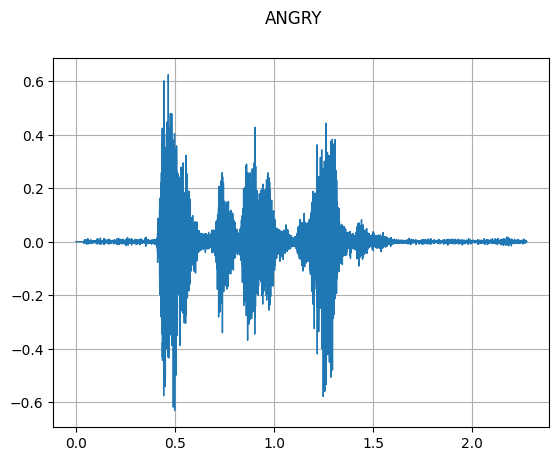

In [9]:
# ANGRY
plot_waveform(samples['ANG'][0],samples['ANG'][1], title='ANGRY')
play_audio(samples['ANG'][0],samples['ANG'][1])

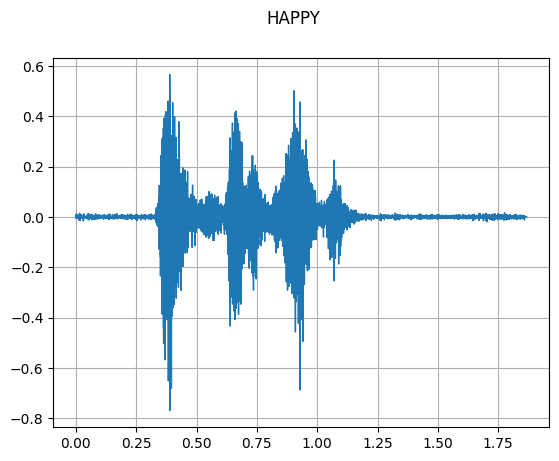

In [22]:
# HAPPY
plot_waveform(samples['HAP'][0],samples['HAP'][1], title='HAPPY')
play_audio(samples['HAP'][0],samples['HAP'][1])

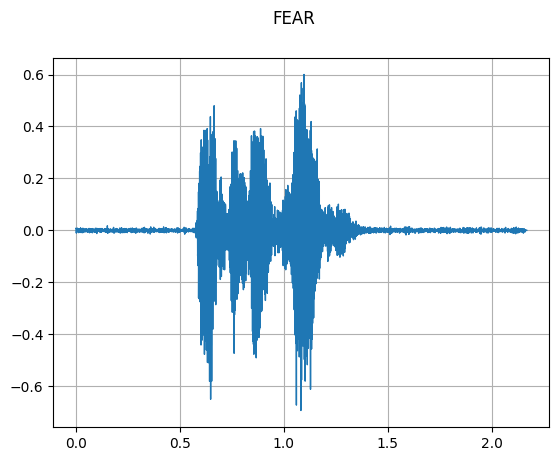

In [10]:
# FEAR
plot_waveform(samples['FEA'][0],samples['FEA'][1], title='FEAR')
play_audio(samples['FEA'][0],samples['FEA'][1])

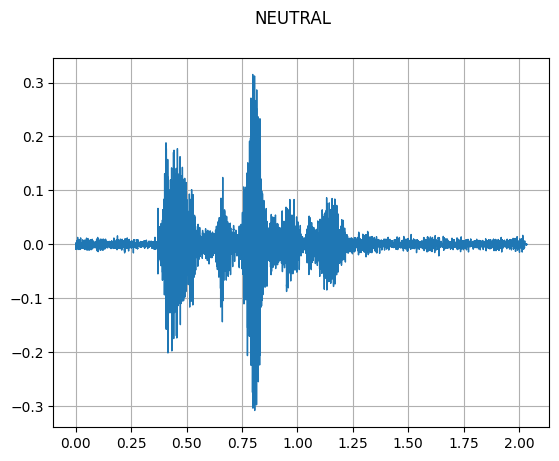

In [11]:
# NEUTRAL
plot_waveform(samples['NEU'][0],samples['NEU'][1], title='NEUTRAL')
play_audio(samples['NEU'][0],samples['NEU'][1])

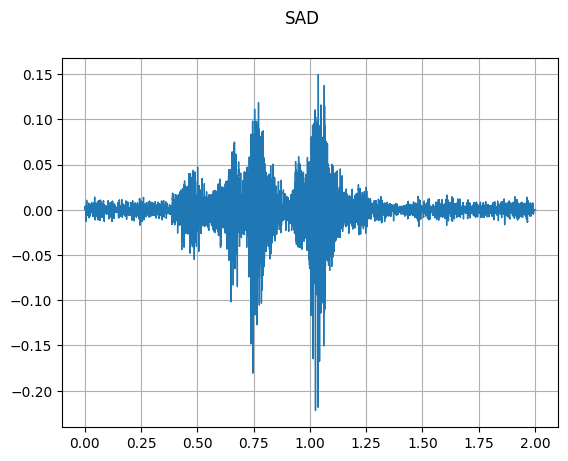

In [12]:
# SAD
plot_waveform(samples['SAD'][0],samples['SAD'][1], title='SAD')
play_audio(samples['SAD'][0],samples['SAD'][1])

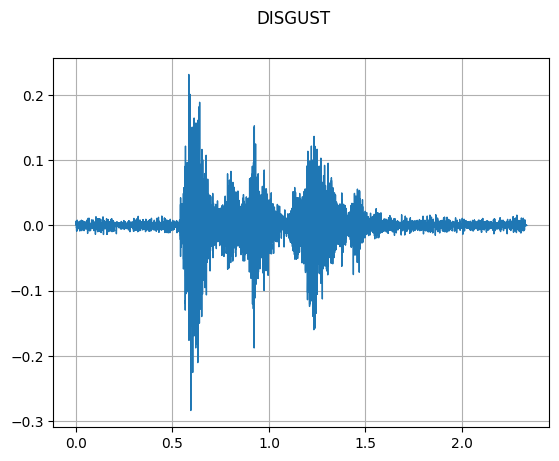

In [13]:
# DISGUST
plot_waveform(samples['DIS'][0],samples['DIS'][1], title='DISGUST')
play_audio(samples['DIS'][0],samples['DIS'][1])

In [58]:
def pad(lst):
    max_len = len(max(lst,key=len))
    new_lst = []
    for l in lst:
        if len(l)<max_len:
            l = np.pad(l,(1,max_len-len(l)-1))
        
        new_lst.append(l)
    
    return np.array(new_lst)

In [74]:
def extract_features(audio_data, features={'ZCST', 'ENE', 'MEL'}, frame_length=2048, hop_length=128):
    space = []
    zcst = []
    ene = []
    for audio in audio_data:
        if 'ZCST' in features:
            zcs = librosa.feature.zero_crossing_rate(audio).reshape(-1)
            zcst.append(zcs)

        if 'ENE' in features:
            energy = np.array([np.sum(audio[i:i+frame_length]**2)/frame_length for i in range(0,len(audio),hop_length)])
            ene.append(energy)
       
    if 'ZCST' in features:
        space.append(pad(zcst))
    if 'ENE' in features:
        space.append(pad(ene))
            
    return space

In [15]:
FS = audios[0][1]
audios = [audio[0] for audio in audios]

In [34]:
len(audios)

torch.Size([36409])

In [26]:
audios_np = [np.array(audio).reshape(-1) for audio in audios]

In [35]:
df = pd.concat([pd.Series(audios_np, name='waveforms'), pd.Series(labels,name='Labels')], axis=1)
df

,waveforms,Labels
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ANG
1,"[0.00091552734, 0.0013122559, 0.0015869141, 0....",DIS
2,"[0.008026123, 0.008453369, 0.008361816, 0.0074...",FEA
3,"[-0.004333496, -0.0032653809, -0.0030212402, -...",HAP
4,"[0.0024108887, 0.001373291, 0.0013122559, 0.00...",NEU
...,...,...
7437,"[0.00091552734, 0.0014038086, 0.001373291, 0.0...",DIS
7438,"[-0.006958008, -0.0067749023, -0.0072021484, -...",FEA
7439,"[-0.0022583008, -0.0018615723, -0.002319336, -...",HAP
7440,"[-0.0016174316, -0.0010681152, -0.00076293945,...",NEU


In [75]:
sp = extract_features(df['waveforms'].to_numpy())

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 7442) + inhomogeneous part.

In [72]:
sp[0].shape

(7442, 157)

In [73]:
sp[1].shape

(7442, 626)

In [49]:
for l in sp[0]:
    print(len(l))

72
73
68
59
64
63
61
65
83
63
63
60
50
48
51
56
54
53
51
63
60
55
67
71
89
63
78
61
75
68
66
78
82
75
81
69
67
69
77
84
100
81
75
66
89
89
72
65
69
62
71
64
94
92
75
75
72
72
73
86
76
79
81
88
97
69
70
72
80
95
79
68
60
68
77
79
86
84
73
72
86
73
81
80
86
69
79
75
86
76
87
94
90
82
101
82
61
79
89
71
81
86
71
75
89
87
82
73
73
84
92
119
110
87
79
86
85
89
78
77
73
83
82
97
102
90
83
85
76
97
82
78
79
75
86
114
92
84
90
85
79
101
87
80
83
87
80
113
99
76
99
77
87
73
64
75
76
82
108
79
87
77
86
99
102
96
103
102
101
81
72
81
100
63
65
87
81
79
69
75
72
71
78
79
84
86
104
84
91
101
89
115
127
111
99
127
114
117
116
99
117
117
110
111
138
115
122
124
117
107
97
70
110
91
85
70
133
101
104
117
118
90
101
99
99
115
70
100
134
91
103
80
137
125
113
102
106
108
93
111
109
104
100
108
106
96
91
95
86
97
89
126
84
91
152
77
114
106
108
87
92
76
95
73
157
89
127
82
85
77
70
80
90
103
114
117
94
114
111
106
96
86
90
70
94
100
70
106
94
122
104
75
92
84
103
95
89
104
114
101
101
116
104
106
122
92
